<a href="https://colab.research.google.com/github/dauphin95/data_spring/blob/master/%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98_09_17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U pandas-profiling

     |████████████████████████████████| 248 kB 2.9 MB/s 
     |████████████████████████████████| 10.1 MB 33.5 MB/s 
     |████████████████████████████████| 3.1 MB 34.5 MB/s 
     |████████████████████████████████| 636 kB 37.3 MB/s 
     |████████████████████████████████| 102 kB 48.2 MB/s 
     |████████████████████████████████| 675 kB 38.2 MB/s 
     |████████████████████████████████| 62 kB 814 kB/s 
     |████████████████████████████████| 812 kB 26.4 MB/s 
     |████████████████████████████████| 28.5 MB 48 kB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=f00e6c6a54f458ae178284ccd4d9c2952057ef7a4a43aa115ac2f97f48b05392
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
  Created wheel for imagehash: filename=ImageHash-4.2.1-py2.py3-none-any.whl size=295207 sha256=c5c427dc5eb63a50e5cb3edb1769ab501be8bc5e6721c7ee146c378f830703dc
  Stored in directory: /root/.cache/pip/wheels/4c/d5/59/5e3e

In [2]:
import pandas as pd

In [3]:
import pandas_profiling

In [4]:
df = pd.read_csv('credit_cards_dataset.csv')

In [5]:
df.head(3)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0


In [6]:
# df.profile_report()

In [7]:
# df.corr(method='spearman')

In [9]:
## 랜덤포레스트 알고리즘
from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
# from sklearn.tree import DecisionTreeClassifier

Y = df['default.payment.next.month'].values
X = df.drop(['ID','default.payment.next.month'], axis =1).values

test_size = 0.3
seed = 42
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
model = RandomForestClassifier(n_estimators=150, criterion = 'entropy', max_features='auto')
model.fit(X_train, Y_train)

result = model.score(X_test, Y_test)
print(f"Accuracy: {result*100}")

Accuracy: 81.4888888888889


In [10]:
## 리콜값 검증 (recall) -> 거의 맞지 않음, 새로운 알고리즘 가져오기
from sklearn.metrics import recall_score

y_predict = model.predict(X_test)

print("Recall score:"+ str(recall_score(Y_test, y_predict)))

Recall score:0.3673469387755102


Confusion matrix, without normalization
[[6614  426]
 [1240  720]]


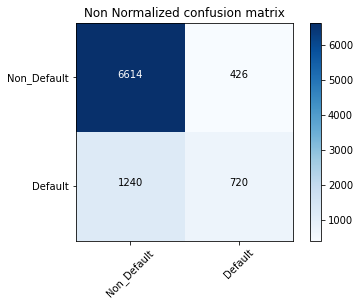

In [11]:
from sklearn.metrics import confusion_matrix
import itertools
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
cnf_matrix = confusion_matrix(Y_test, y_predict)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Non_Default','Default'], normalize=False,
                      title='Non Normalized confusion matrix')

In [12]:
import sklearn.metrics as metrics

print('accuracy', metrics.accuracy_score(Y_test, y_predict) )

print('precision', metrics.precision_score(Y_test, y_predict) )

print('recall', metrics.recall_score(Y_test, y_predict) )

print('f1', metrics.f1_score(Y_test, y_predict) )

print(metrics.classification_report(Y_test, y_predict))

print(metrics.confusion_matrix(Y_test, y_predict))

accuracy 0.8148888888888889
precision 0.6282722513089005
recall 0.3673469387755102
f1 0.46361880231809405
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7040
           1       0.63      0.37      0.46      1960

    accuracy                           0.81      9000
   macro avg       0.74      0.65      0.68      9000
weighted avg       0.80      0.81      0.80      9000

[[6614  426]
 [1240  720]]
